## Data Wrangling:

In [2]:
#import packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import random
from scipy import stats
#import data
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv',sep =';')
assert pd.notnull(white).all().all()
assert pd.notnull(red).all().all()

In [3]:
# inspect red wine data
print('Red:')
print('Describe:')
print(red.describe())
print('Info:')
print(red.info())
print('Shape:')
print(red.shape)
print('Columns:')
print(red.columns)

print()

#inspect white wine data
print('White:')
print('Describe:')
print(white.describe())
print('Info:')
print(white.info())
print('Shape:')
print(white.shape)
print('Columns:')
print(white.columns)


Red:
Describe:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.

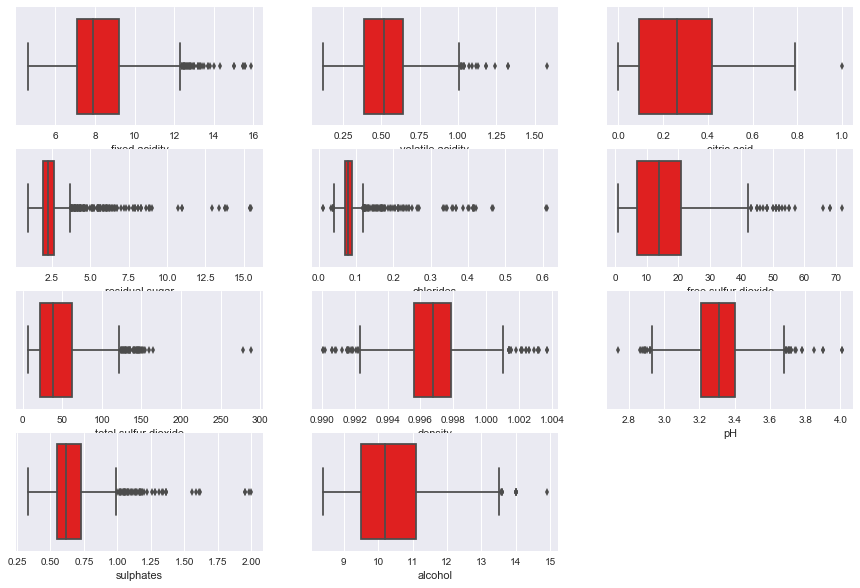

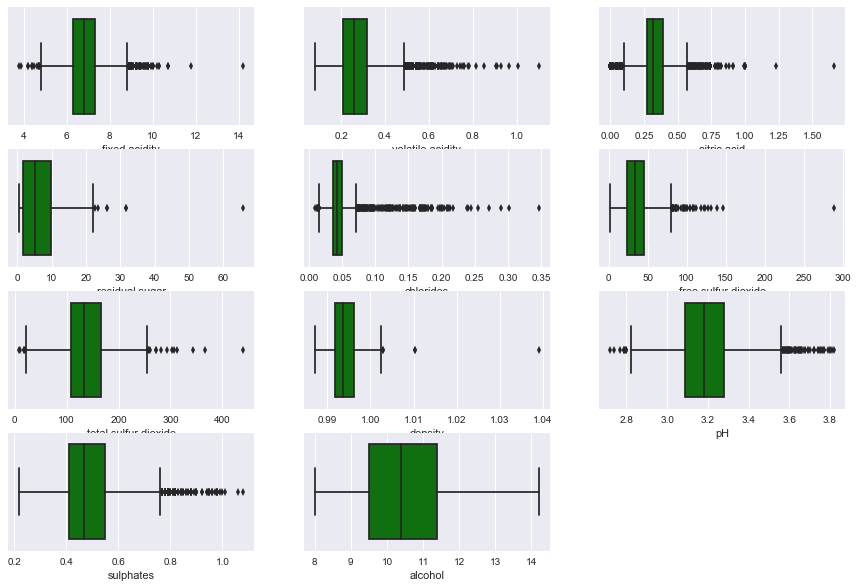

In [4]:
# check boxplots of observed physichemical variables for normality and outliers
sns.set()

#increase  figure size
mpl.rcParams['figure.figsize'] = (15,10)

#loop through red variables to check
for i, col in enumerate(red.columns[:11]):
    plt.subplot(4,3,i+1)
    sns.boxplot(red[col], color = 'red')
plt.show()
    
# loop through white variables to check
for i, col in enumerate(white.columns[:11]):
    plt.subplot(4,3,i+1)
    sns.boxplot(white[col], color = 'green')
plt.show()

In [5]:
# check quality variable spread white
white.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,20,20,20,20,20,20,20,20,20,20,20
4,163,163,163,163,163,163,163,163,163,163,163
5,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
6,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
7,880,880,880,880,880,880,880,880,880,880,880
8,175,175,175,175,175,175,175,175,175,175,175
9,5,5,5,5,5,5,5,5,5,5,5


In [6]:
# check quality variable spread red
red.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [7]:
# removing outliers that are more than 2 standard deviations
# loop through physiochemical variables of white to remove outliers
for idx in white.columns[:11]:
    p975, p25 = np.percentile(white[idx], [97.5 ,2.5])
    white = white.loc[white[idx]<= (p975)]
    white = white.loc[white[idx]>=p25]
print(white.info())
print()

# loop through physiochemical variables of red to remove outliers
for idx in red.columns[:11]:
    p975, p25 = np.percentile(red[idx], [97.5 ,2.5])
    red = red.loc[red[idx]<= (p975)]
    red = red.loc[red[idx]>= (p25)]
print(red.info())


#create dictionary tochange quality categorical variables: 1-4 = poor , 5-7 = good, and 8-10 =excellent
dic = {1:'poor', 2:'poor', 3: 'poor', 4: 'poor', 5:'good', 6: 'good', 7: 'excellent', 8: 'excellent', 9: 'excellent', 10: 'excellent'}
#use .replace and dic on white quality
white.quality = white.quality.replace(dic)
#use .replace and dic on red quality
red.quality = red.quality.replace(dic)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935 entries, 1 to 4895
Data columns (total 12 columns):
fixed acidity           2935 non-null float64
volatile acidity        2935 non-null float64
citric acid             2935 non-null float64
residual sugar          2935 non-null float64
chlorides               2935 non-null float64
free sulfur dioxide     2935 non-null float64
total sulfur dioxide    2935 non-null float64
density                 2935 non-null float64
pH                      2935 non-null float64
sulphates               2935 non-null float64
alcohol                 2935 non-null float64
quality                 2935 non-null int64
dtypes: float64(11), int64(1)
memory usage: 298.1 KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1012 non-null float64
volatile acidity        1012 non-null float64
citric acid             1012 non-null float64
residual sugar          1012 non-null f

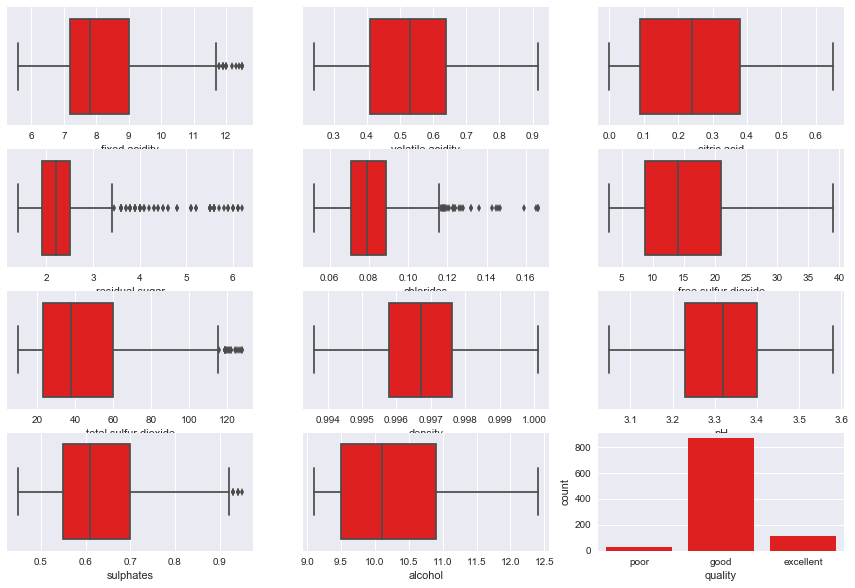

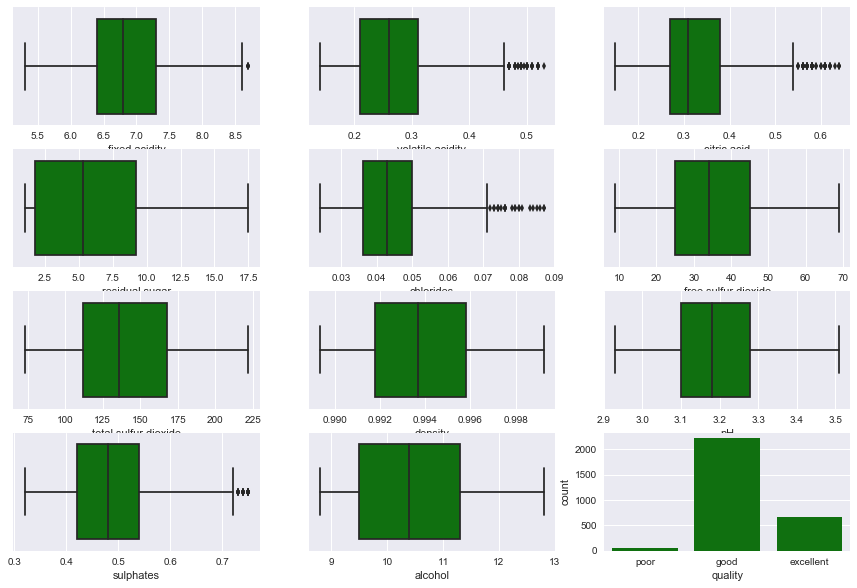

In [8]:
#check all data with box plots for physiochemical properties and count plot for quality
sns.set()
#chcek red
for i, col in enumerate(red.columns[:11]):
    plt.subplot(4,3,i+1)
    sns.boxplot(red[col], color = 'red')
plt.subplot(4,3,12)
sns.countplot(x ='quality', data = red, color ='red', order = ['poor', 'good', 'excellent'])
plt.show()


#check white using loop through physiochemical properties
for i, col in enumerate(white.columns[:11]):
    plt.subplot(4,3,i+1)
    sns.boxplot(white[col], color = 'green')
plt.subplot(4,3,12)
sns.countplot(x = 'quality' ,data = white , color ='green', order = ['poor', 'good', 'excellent'])
plt.show()


## Data story:
    The first item of note is that in both data sets good wines are very common but there are very for poor and excellent wines.

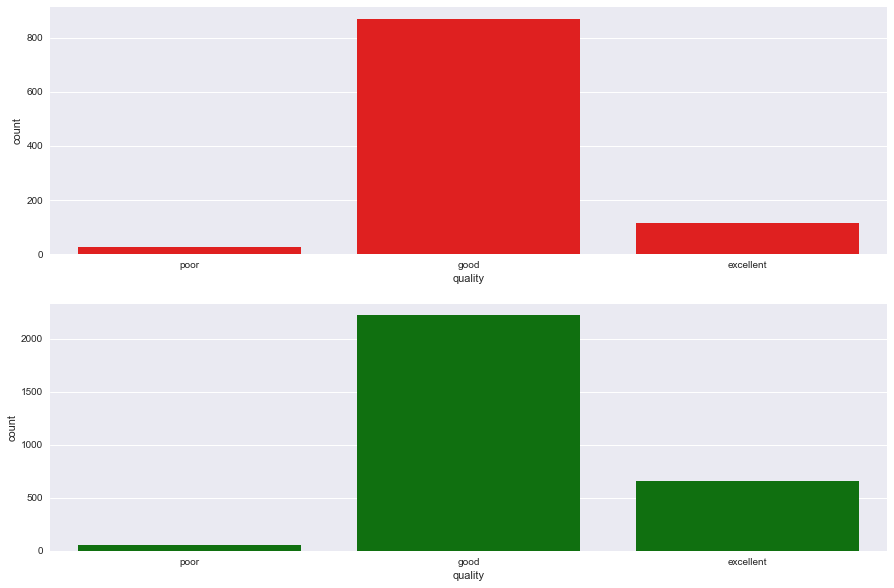

In [9]:
# show how there are a lot of good wines and very few poor or excellent
sns.set()
plt.subplot(2,1,1)
sns.countplot(x ='quality', data = red, color ='red', order = ['poor', 'good', 'excellent'])
plt.subplot(2,1,2)
sns.countplot(x = 'quality' ,data = white , color ='green', order = ['poor', 'good', 'excellent'])
plt.show()

Which physiochemical properties have differences in spread between poor, good, and excellent quality wines?

Red:


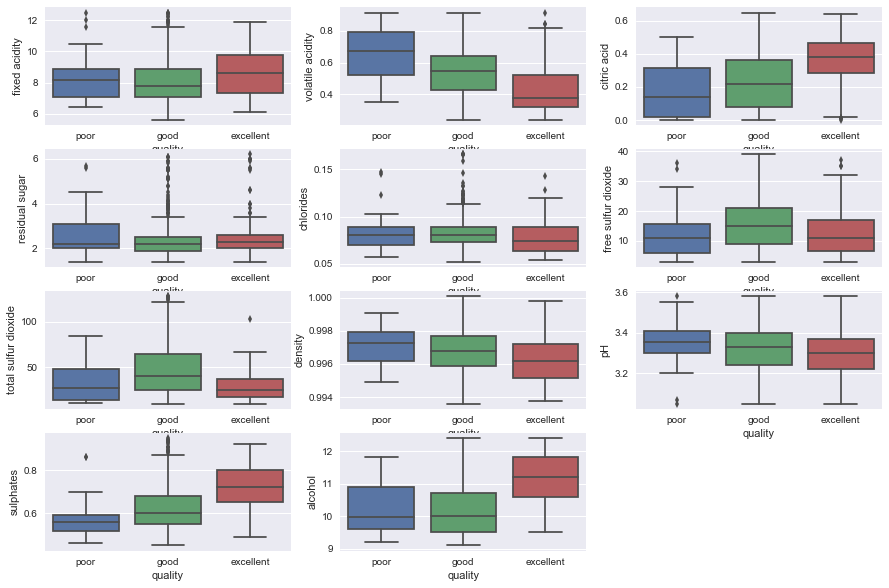

White:


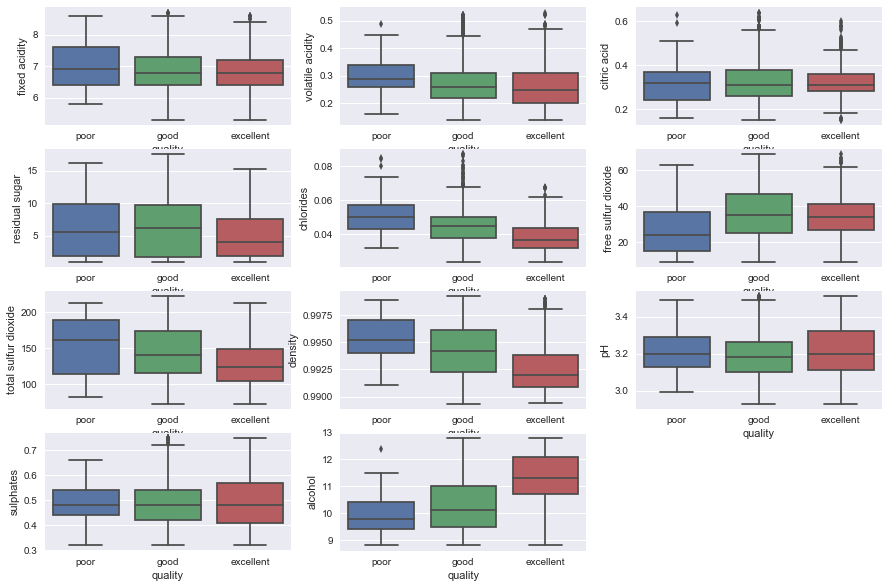

In [10]:
# check physiochemical influence on quality
sns.set()
# check red
print('Red:')
for i, col in enumerate(red.columns[:11]):
    plt.subplot(4,3,i+1)
    sns.boxplot(x='quality',y=col, data = red, order = ['poor', 'good', 'excellent'])
plt.show()
#check white
print('White:')
for i, col in enumerate(white.columns[:11]):
    plt.subplot(4,3,i+1)
    sns.boxplot(x='quality',y=col, data = white, order = ['poor', 'good', 'excellent'])
plt.show()


    The above graphs show that there are differences in spread amoung certain physicochemical properties. The question still remains if these differences are significant however. Inferential statistics will be needed to answer this question accuately.

Investigate importance of combined physiochemical properties using regression and pairplot on the normailized z scores:

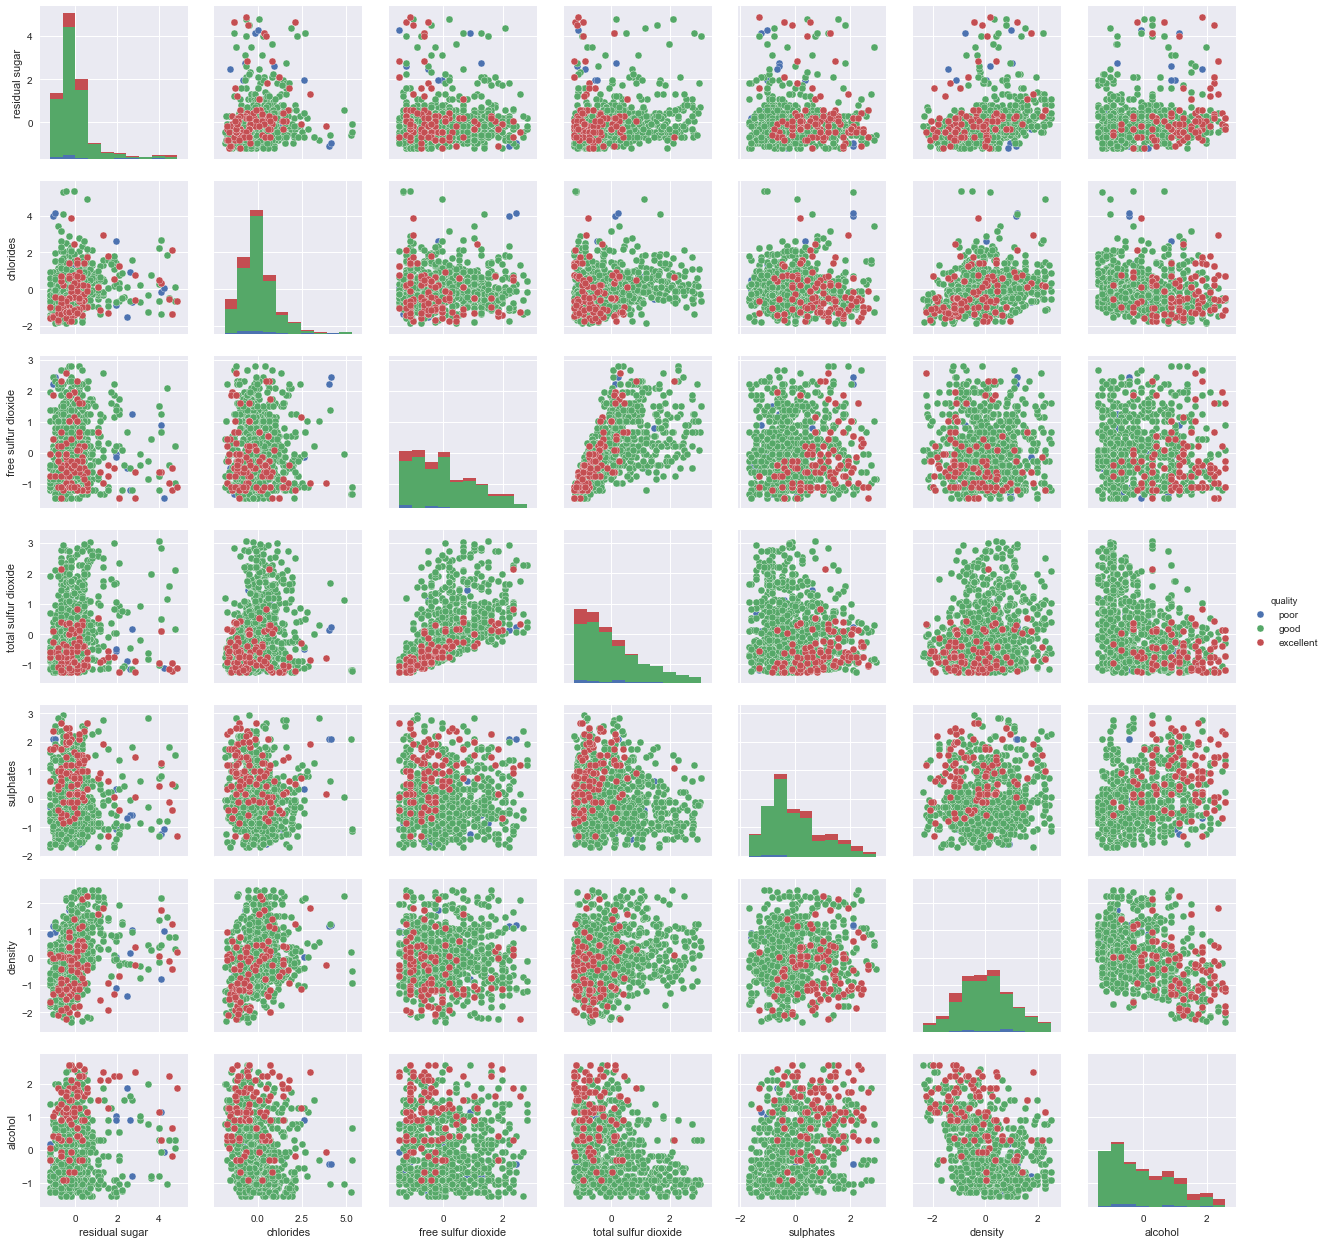

In [14]:
#create normalized data to plot
cols = list(red.columns)
cols.remove('quality')
redNorm = pd.DataFrame()
for col in cols:
    redNorm[col] = (red[col] - red[col].mean())/red[col].std(ddof=0)
redNorm['quality']  = red['quality']
sns.set()
sns.pairplot(redNorm, hue = 'quality', hue_order =['poor','good', 'excellent'], vars =['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates',  'density','alcohol'])
plt.show()

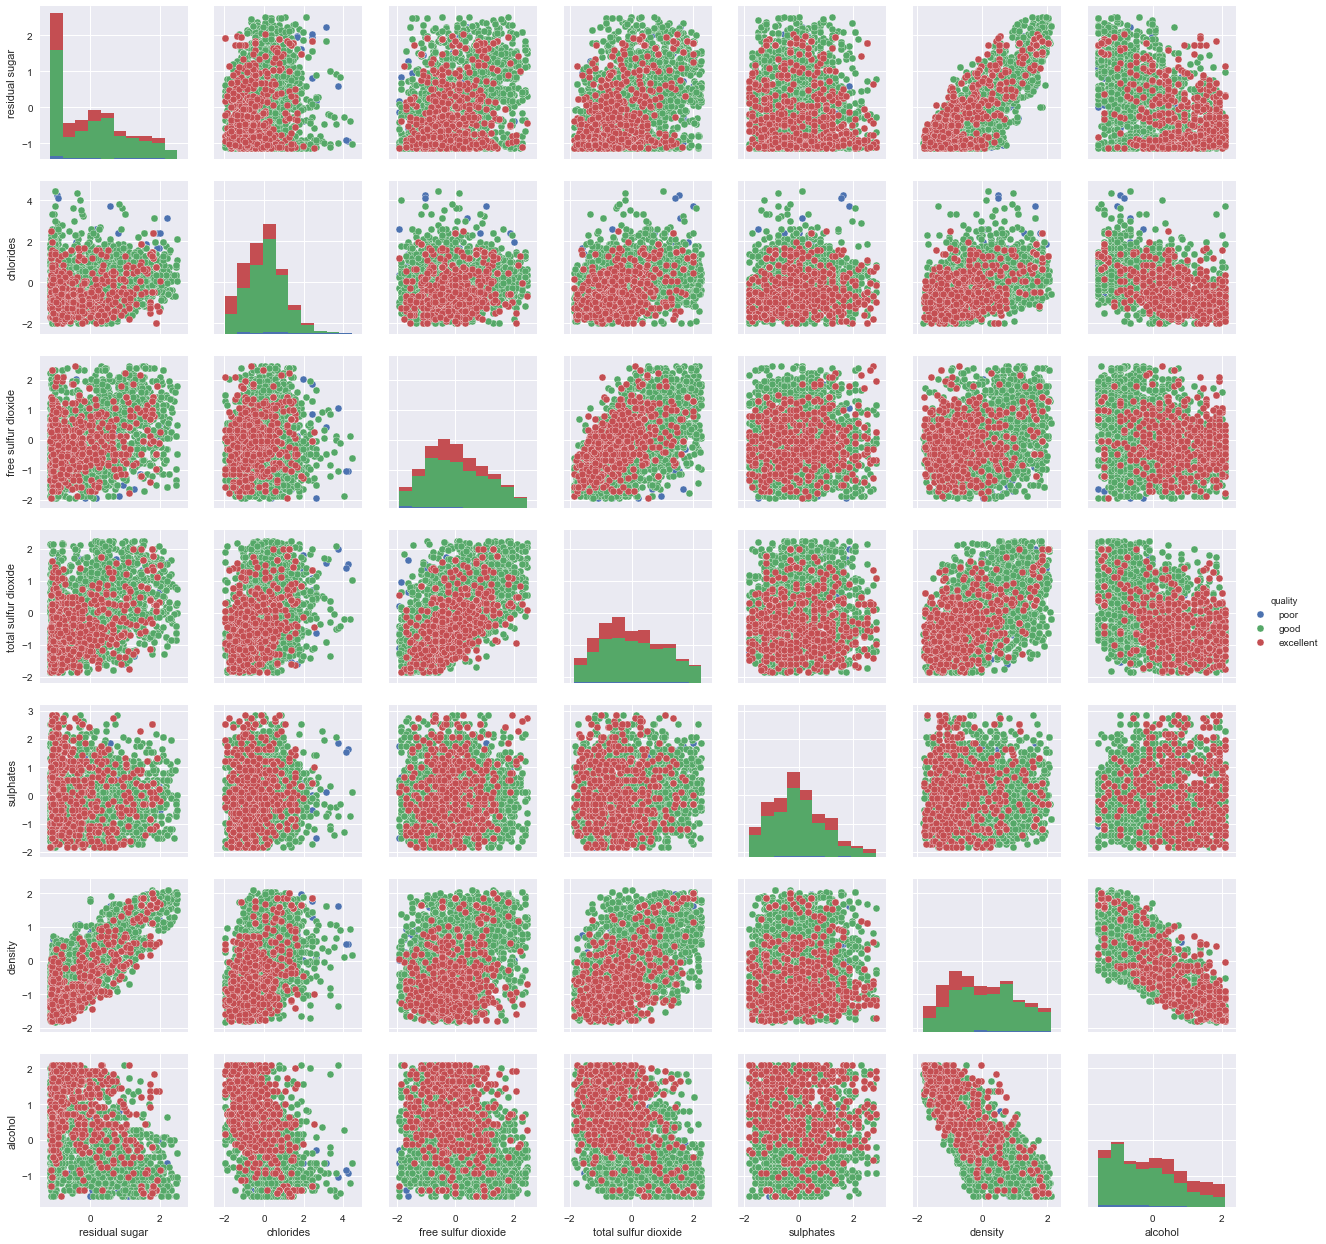

In [15]:
#create normalized data to plot
cols = list(white.columns)
cols.remove('quality')
whiteNorm = pd.DataFrame()
for col in cols:
    whiteNorm[col] = (white[col] - white[col].mean())/white[col].std(ddof=0)
whiteNorm['quality']  = white['quality']
sns.set()
sns.pairplot(whiteNorm.sample(frac= 1), hue = 'quality', hue_order =['poor','good', 'excellent'], vars =['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'density','alcohol'])

plt.show()

    The above pairplots futher show the impact of certain physiochemical properties and uses color to show which quality the obeservation was. Areas with concentraded red observations show that residual sugar, chlorides, density, and alcohol may be some of the most impactful physiocochemical properties. Again inferential statistics will be needed to make definitive answers regarding the influnce these factors have on the output variable quality.
    
## Inferential Statistics

In [12]:
whiteExce = white[white.quality == 'excellent']
whiteGood = white[white.quality == 'good']
print(whiteExce.info(),whiteGood.info())


redExce = red[red.quality == 'excellent']
redGood = red[red.quality == 'good']
print(redExce.info(), redGood.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 15 to 4876
Data columns (total 12 columns):
fixed acidity           658 non-null float64
volatile acidity        658 non-null float64
citric acid             658 non-null float64
residual sugar          658 non-null float64
chlorides               658 non-null float64
free sulfur dioxide     658 non-null float64
total sulfur dioxide    658 non-null float64
density                 658 non-null float64
pH                      658 non-null float64
sulphates               658 non-null float64
alcohol                 658 non-null float64
quality                 658 non-null object
dtypes: float64(11), object(1)
memory usage: 66.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 1 to 4895
Data columns (total 12 columns):
fixed acidity           2220 non-null float64
volatile acidity        2220 non-null float64
citric acid             2220 non-null float64
residual sugar          2220 non-null float64
chlorides

In [13]:
# null hypothesis: excellent wines have the same mean as good wines
for i in whiteExce.columns[:11]:
    print('White',i,': ', stats.ttest_ind(whiteExce[i],whiteGood[i], equal_var=True))

print()

for i in redExce.columns[:11]:
    print('Red',i,': ', stats.ttest_ind(redExce[i],redGood[i], equal_var=True))



White fixed acidity :  Ttest_indResult(statistic=-0.011401716537003677, pvalue=0.99090373431796552)
White volatile acidity :  Ttest_indResult(statistic=-2.2052361421003868, pvalue=0.027516383886793918)
White citric acid :  Ttest_indResult(statistic=-0.16411054483876975, pvalue=0.86965565270977718)
White residual sugar :  Ttest_indResult(statistic=-5.51665371415862, pvalue=3.7622171653053127e-08)
White chlorides :  Ttest_indResult(statistic=-13.743451576665883, pvalue=1.1237869952223048e-41)
White free sulfur dioxide :  Ttest_indResult(statistic=-2.9460650653342779, pvalue=0.003244292861749808)
White total sulfur dioxide :  Ttest_indResult(statistic=-10.592192625041735, pvalue=9.5917899580661812e-26)
White density :  Ttest_indResult(statistic=-14.858339317134899, pvalue=3.592016987636861e-48)
White pH :  Ttest_indResult(statistic=4.5192524433865824, pvalue=6.4562889862148253e-06)
White sulphates :  Ttest_indResult(statistic=1.5792262420428618, pvalue=0.1143941429828691)
White alcohol : 

white rejected null hypothesis  at alpha =.01 are :
* residual sugar, chlorides, free sulfer dioxide, total sulfer dioxide,  density, pH, and alcohol

red rejected null hypothesis  at alpha =.01 are :
* fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulpher dioxide, total sulpher dioxide, density, sulphates, and alcohol

shared rejected hull hypothesis between red and white wines are : 
* residual sugar, chlorides, free sulfer dioxide, total sulfer dioxide, density, and alcohol